In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as gos
import plotly.figure_factory as ff
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Moving Average Smoothing**

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions.

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting. Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value. The moving part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series. There are two main types of moving average that are used: Centered and Trailing Moving Average.

**Centered Moving Average (not often used in forecasting)** 

The value at time (t) is calculated as the average of raw observations at, before, and after time
(t). For example, a center moving average with a window of 3 would be calculated as:

$\ center_ ma(t) = mean[obs(t - 1), obs(t), obs(t + 1)]$

**This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting.**


**Trailing Moving Average**

The value at time (t) is calculated as the average of the raw observations at and before the
time (t). For example, a trailing moving average with a window of 3 would be calculated as:

$\ trail_ma(t) = mean[obs(t - 2), obs(t - 1), obs(t)]$

**Trailing moving average only uses historical observations and is used on time series forecasting.**

### **Data Expectations**

Calculating a moving average of a time series makes some assumptions about your data. It is assumed that both trend and seasonal components have been removed from your time series. This means that your time series is stationary, or does not show obvious trends (long-term increasing or decreasing movement) or seasonality (consistent periodic structure). 

There are many methods to remove trends and seasonality from a time series dataset when forecasting. Two good methods for each are;
- To use the differencing method and to model the
behavior and explicitly subtract it from the series.
- To use moving average values can be used in a number of ways when using machine learning algorithms on time series problems.

**Moving Average as Data Preparation**

Moving average can be used as a data preparation technique to create a smoothed version of the original dataset. Smoothing is useful as a data preparation technique as it can reduce the random variation in the observations and better expose the structure of the underlying causal processes.

The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset.

In [3]:
# Moving average smoothing as a data preparation

series = pd.read_csv('daily-total-female-births.csv', header=0,squeeze=True,
                    index_col=0,parse_dates=True)

rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64

In [4]:
series.head(10)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64

Text(0.5, 1.0, 'Original vs Windowed')

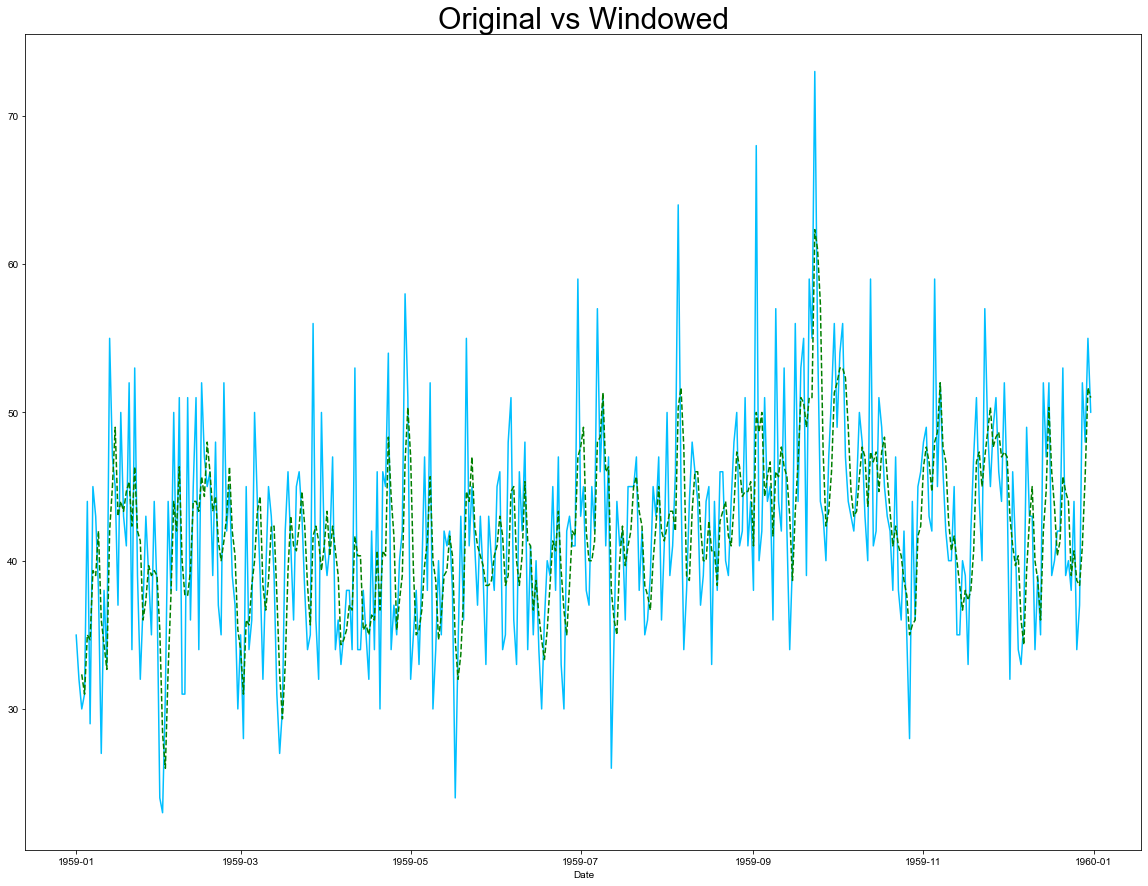

In [5]:
fig, ax = plt.subplots(figsize=(20,15))
sns.set_theme(style='darkgrid')

sns.lineplot(data=series,x=series.index,y=series.values, color='deepskyblue')
sns.lineplot(data=rolling_mean,x=rolling_mean.index,y=rolling_mean.values, color='green',linestyle='--')

ax.set_title("Original vs Windowed", fontdict={
    "fontsize":30,
    "fontstyle":'normal'
})

Text(0.5, 1.0, 'Original vs Windowed Zoomed 100 datapoints')

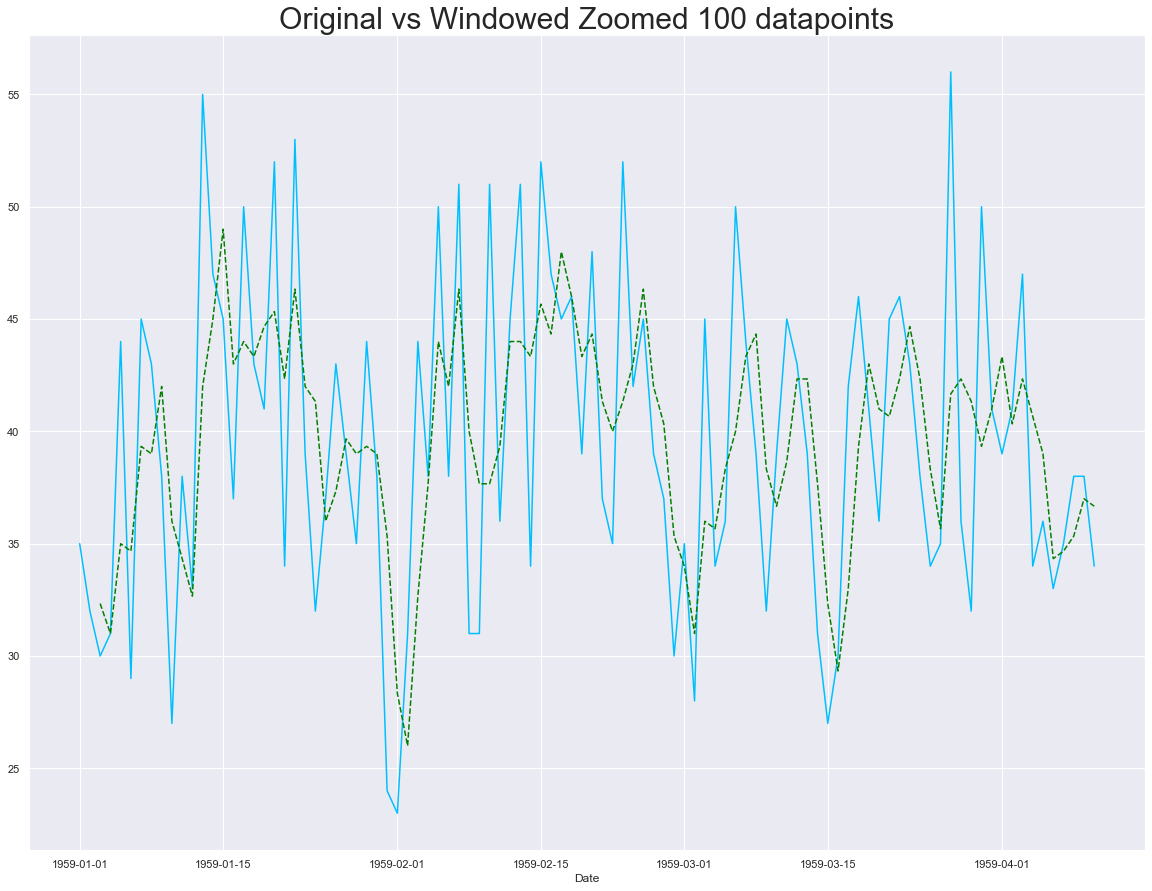

In [6]:
fig, ax = plt.subplots(figsize=(20,15))
sns.set_theme(style='darkgrid')

sns.lineplot(data=series,x=series.index[:100],y=series.values[:100], color='deepskyblue')
sns.lineplot(data=rolling_mean,x=rolling_mean.index[:100],y=rolling_mean.values[:100], color='green',linestyle='--')

ax.set_title("Original vs Windowed Zoomed 100 datapoints", fontdict={
    "fontsize":30,
    "fontstyle":'normal'
})

Here, you can clearly see the lag in the transformed dataset. Next, let's take a look at using the moving average as a feature engineering method.

**Moving Average as Feature Engineering**

The moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem. In this case, the moving average is calculated and added as a new input feature used to predict the next time step.

In [7]:
pd.DataFrame(series.values).head(10)

,0
0,35
1,32
2,30
3,31
4,44
5,29
6,45
7,43
8,38
9,27


In [8]:
df = pd.DataFrame(series.values)
df
width = 3 
lag1 = df.shift(1)
lag1.head(10)

,0
0,NaN
1,35.0
2,32.0
3,30.0
4,31.0
5,44.0
6,29.0
7,45.0
8,43.0
9,38.0


In [9]:
lag3 = df.shift(width - 1) # The previous values; mean & t
lag3.head(10)

,0
0,NaN
1,NaN
2,35.0
3,32.0
4,30.0
5,31.0
6,44.0
7,29.0
8,45.0
9,43.0


In [10]:
window = lag3.rolling(window=width) # It will use 3 values from lag3 for the window
means = window.mean()
means.head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,32.333333
5,31.000000
6,35.000000
7,34.666667
8,39.333333
9,39.000000


In [11]:
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean','t','t+1']
dataframe.head(10)

# The code was broken down to explain and understand what was going on 

,mean,t,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44
5,31.000000,44.0,29
6,35.000000,29.0,45
7,34.666667,45.0,43
8,39.333333,43.0,38
9,39.000000,38.0,27


**Moving Average as Prediction**

The moving average value can also be used directly to make predictions. It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. The moving average model for predictions can easily be used in a walk-forward manner. As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day. We can implement this manually in Python.

In [12]:
series.head(10)

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
Name: Births, dtype: int64

Predicted= 32.333333333333336, expected= 31
Predicted= 31.0, expected= 44
Predicted= 35.0, expected= 29
Predicted= 34.666666666666664, expected= 45
Predicted= 39.333333333333336, expected= 43
Predicted= 39.0, expected= 38
Predicted= 42.0, expected= 27
Predicted= 36.0, expected= 38
Predicted= 34.333333333333336, expected= 33
Predicted= 32.666666666666664, expected= 55
Predicted= 42.0, expected= 47
Predicted= 45.0, expected= 45
Predicted= 49.0, expected= 37
Predicted= 43.0, expected= 50
Predicted= 44.0, expected= 43
Predicted= 43.333333333333336, expected= 41
Predicted= 44.666666666666664, expected= 52
Predicted= 45.333333333333336, expected= 34
Predicted= 42.333333333333336, expected= 53
Predicted= 46.333333333333336, expected= 39
Predicted= 42.0, expected= 32
Predicted= 41.333333333333336, expected= 37
Predicted= 36.0, expected= 43
Predicted= 37.333333333333336, expected= 39
Predicted= 39.666666666666664, expected= 35
Predicted= 39.0, expected= 44
Predicted= 39.333333333333336, expecte

Text(0.5, 1.0, 'Test vs Predictions (Zoomed)')

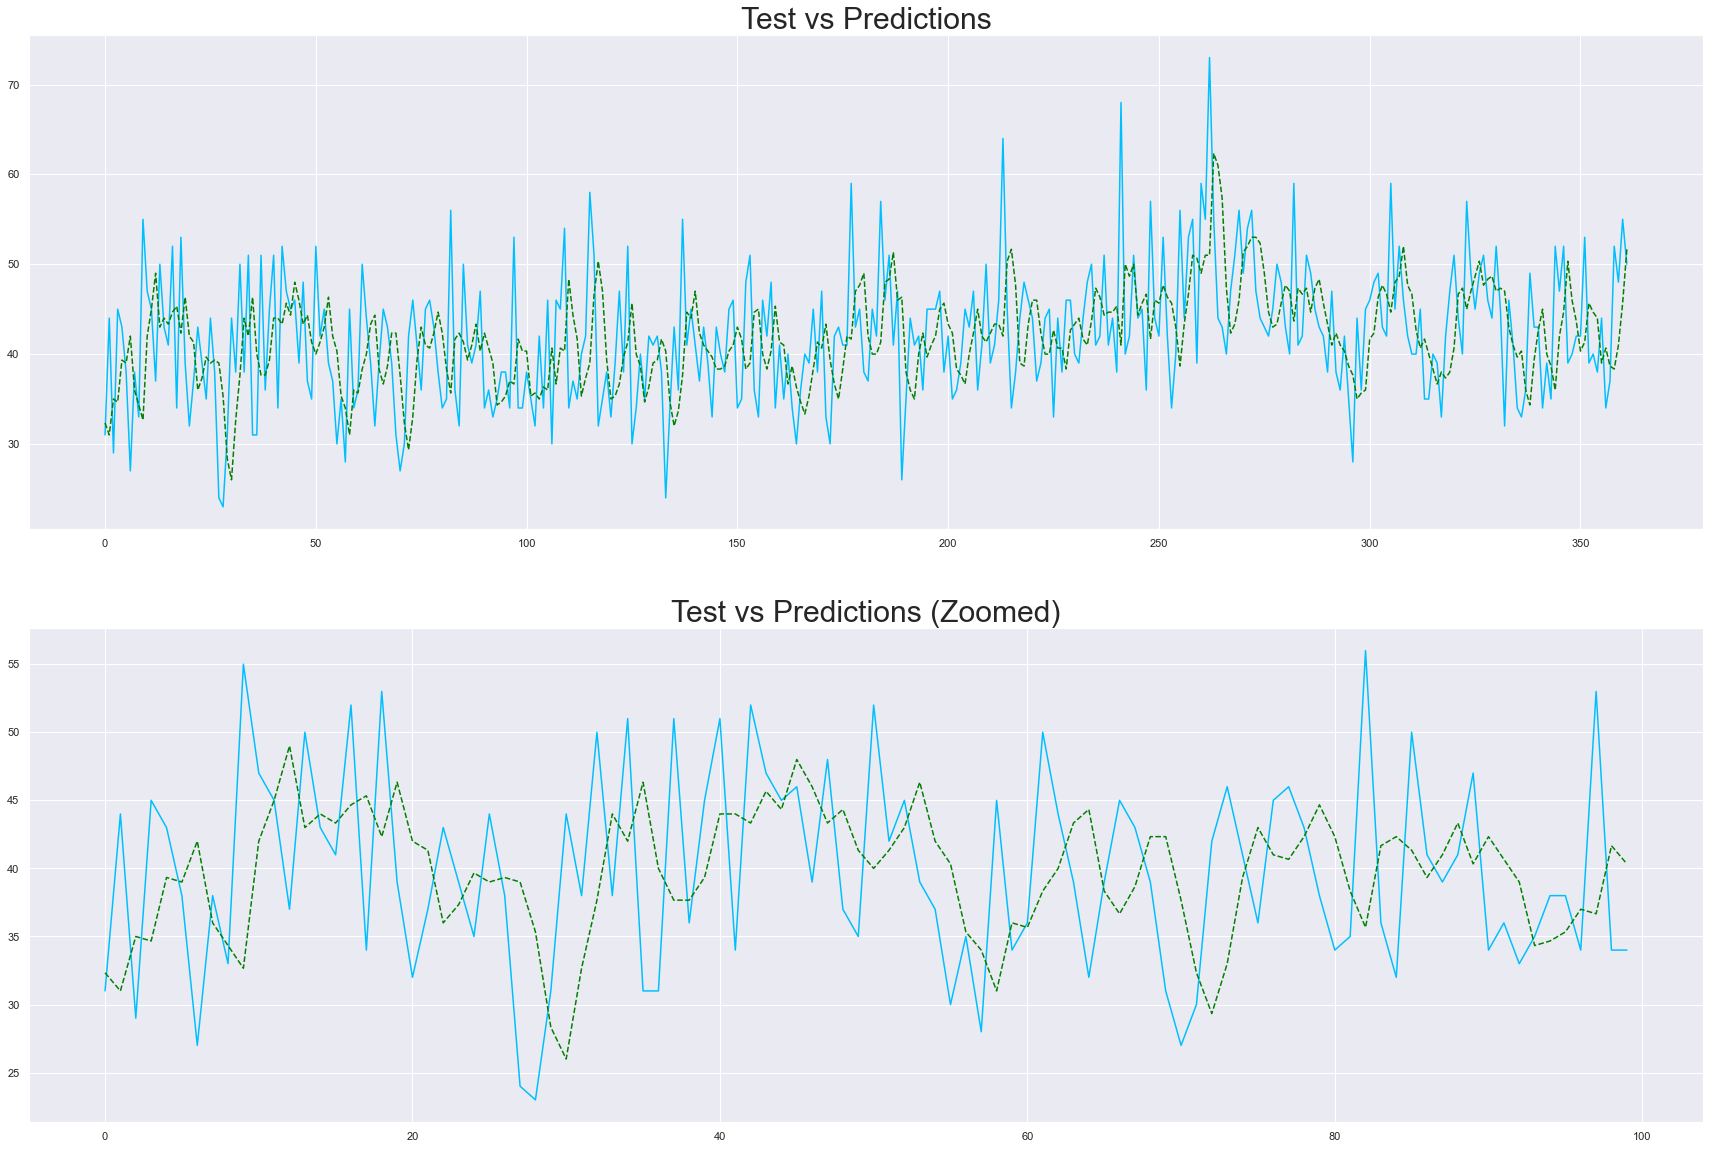

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error

X = series.values
window = 3
history = [X[i] for i in range(window)]  
# history # [35, 32, 30]
test = [X[i] for i in range(window, len(X))] # starting at index 3
# test[:10] # [31, 44, 29, 45, 43, 38, 27, 38, 33, 55]

predictions = []

# Walk forward over time steps in test 
for t in range(len(test)):
    length = len(history)
    # what is the mean of yhat; 35+ 32+ 30 = 32.333333333333336 from the start
    # history's initial lenght is 3 and  will continue to expand as the program continues, because obs is being appended to history
    yhat = np.mean([history[i] for i in range(length-window, length)]) 
    obs = test[t] # indexes: 0, 1, ......
    predictions.append(yhat) # appending the yhat to predictions
    history.append(obs)  # appending the obs to history
    print(f'Predicted= {yhat}, expected= {obs}')
rmse = mean_squared_error(test,predictions,squared=False) # False means RMSE 
print(f"RMSE: {rmse}")

fig,ax = plt.subplots(2,1, figsize=(30,20))

sns.lineplot(data=test,color='deepskyblue',ax=ax[0])
sns.lineplot(data=predictions,color='green',linestyle='--',ax=ax[0])
ax[0].set_title("Test vs Predictions",fontdict={'fontsize':30})

# Zoomed version
sns.lineplot(data=test[:100],color='deepskyblue',ax=ax[1])
sns.lineplot(data=predictions[:100],color='green',linestyle='--',ax=ax[1])
ax[1].set_title("Test vs Predictions (Zoomed)", fontdict={'fontsize':30})

# This is a naive approach and not really smart